# Confusion Matrix

In [1]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from datetime import datetime

from sklearn import linear_model
# metrics: 計測 → 評価
from sklearn import metrics

from sklearn.model_selection import GridSearchCV
# カーネルなしSVM（SVC: Support Vector Classifierの略）
from sklearn.svm import LinearSVC
# カーネル法を用いたSVM
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [36]:
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams["font.size"] = 10.5

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    
    plt.figure(figsize=(7, 7))
    plt.grid(b=False) # グリッドを非表示
    
    # normalize → 正規化
    if normalize:
        # cmの値は予測結果と実際の値の一致数なので，それを列の合計で割ると確率
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # np.newaxisは次元を追加
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)

    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        # plt.text(): 座標（x, y），表示するテキスト，文字位置，色指定
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    # plt.savefig("pre_confusion_matrix.png")

In [45]:
# e=1.2（一様）
cm = [
        [0.79,  0.09,  0.11,   0,   0.01,   0],
        [0.43, 0.42,  0.12,   0,  0.02,   0,],
        [0.28,  0.08, 0.64,   0,   0,   0,],
        [  0,   0,   0, 0.22, 0.67,  0.11,],
        [  0,   0,   0, 0.13, 0.84,  0.03,],
        [  0,   0,   0,  0.02,  0.01, 0.97,]
    ] 

cm = np.array(cm)
 

In [4]:
# 静的動作，動的動作のcm作成

# print(len(cm)/2)

# cm_2 = [[0, 0], [0, 0]]
# for i in range(len(cm)):
#     if i < len(cm)/2:
#         cm_2[0][0] += sum(cm[i][:int(len(cm)/2)])
#         cm_2[0][1] += sum(cm[i][int(len(cm)/2):])
#     else:
#         cm_2[1][0] += sum(cm[i][:int(len(cm)/2)])
#         cm_2[1][1] += sum(cm[i][int(len(cm)/2):])
# sum(cm[i][int(len(cm)/2):])

# print(cm_2)

# cm_2 = np.array(cm_2)
# print(type(cm_2))

/var/folders/st/dmkj3b756jq20y6qwzjf_twc0000gn/T/ipykernel_52632/26379152.py:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False) # グリッドを非表示


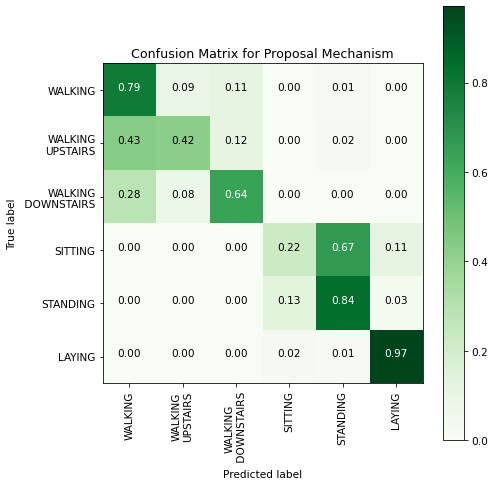

In [46]:
plot_confusion_matrix(cm=cm, classes=['WALKING', 'WALKING\nUPSTAIRS', 'WALKING\n DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING'], normalize=True, title='Confusion Matrix for Proposal Mechanism', cmap=plt.cm.Greens)